In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import skimage.io
import os
import shutil
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from textwrap import wrap
np.random.seed(1234)
%matplotlib inline

In [20]:
#STAGE1_TRAIN = "../orig_data/external_TCGA_train_sub_512x512"
STAGE1_TRAIN = "../stage1_train_fix_v4"

STAGE1_TRAIN_IMAGE_PATTERN = "%s/{}/images/{}.png" % STAGE1_TRAIN
STAGE1_TRAIN_MASK_PATTERN = "%s/{}/masks/*.png" % STAGE1_TRAIN
IMAGE_ID = "image_id"
IMAGE_WIDTH = "width"
IMAGE_WEIGHT = "height"

In [21]:
# Load stage 1 image identifiers.
def image_ids_in(root_dir, ignore=[]):
    ids = []
    for id in os.listdir(root_dir):
        if id in ignore:
            print('Skipping ID:', id)
        else:
            ids.append(id)
    return ids

test_image_ids = image_ids_in(STAGE1_TRAIN)

In [22]:
print(len(test_image_ids))

666


In [23]:
def read_image(image_id, space="rgb"):
#    print(image_id[0:image_id.find("-")])
    image_file = STAGE1_TRAIN_IMAGE_PATTERN.format(image_id, image_id)
    image = skimage.io.imread(image_file)
    # Drop alpha which is not used
    image = image[:, :, :3]
    if space == "hsv":
        image = skimage.color.rgb2hsv(image)
    return image

# Get image width, height and count masks available.
def read_image_hsv(image_id, space="rgb"):
    image_hsv = read_image(image_id, space = space)
    return image_hsv

def get_images_details(image_ids):
    details = []
    count = 0
    for image_id in sorted(image_ids):
        image_hsv = read_image_hsv(image_id, space="hsv")
        height, width, l = image_hsv.shape
        #dominant_colors_hsv, dominant_rates_hsv = get_domimant_colors(image_hsv, top_colors=1)
        #dominant_colors_hsv = dominant_colors_hsv.reshape(1, dominant_colors_hsv.shape[0] * dominant_colors_hsv.shape[1])
        #info = (image_id, width, height, dominant_colors_hsv.squeeze())
        info = (image_id, width, height)
        details.append(info)
        count = count + 1
        print(count, ":", image_id, width, height)
    return details
details = get_images_details(test_image_ids)

1 : 00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552 256 256
2 : 003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1 256 256
3 : 00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e 320 256
4 : 0121d6759c5adb290c8e828fc882f37dfaf3663ec885c663859948c154a443ed 320 256
5 : 01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf 320 256
6 : 0280fa8f60f6bcae0f97d93c28f60be194f9309ff610dc5845e60455b0f87c21 256 256
7 : 0287e7ee5b007c91ae2bd7628d09735e70496bc6127ecb7f3dd043e04ce37426 256 256
8 : 02903040e19ddf92f452907644ad3822918f54af41dd85e5a3fe3e1b6d6f9339 360 360
9 : 03398329ced0c23b9ac3fac84dd53a87d9ffe4d9d10f1b5fe8df8fac12380776 256 256
10 : 03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe 360 360
11 : 03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a 360 360
12 : 0402a81e75262469925ea893b6706183832e85324f7b1e08e634129f5d522cdd 347 260
13 : 04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e 256

111 : 2a1a294e21d76efd0399e4eb321b45f44f7510911acd92c988480195c5b4c812 1024 1024
112 : 2a2032c4ed78f3fc64de7e5efd0bec26a81680b07404eaa54a1744b7ab3f8365 360 360
113 : 2ab91a4408860ae8339689ed9f87aa9359de1bdd4ca5c2eab7fff7724dbd6707 256 256
114 : 2abc40c118bc7303592c8bb95a80361e27560854b8971ab34dcf91966575b1f2 696 520
115 : 2ad489c11ed8b77a9d8a2339ac64ffc38e79281c03a2507db4688fd3186c0fe5 256 256
116 : 2b50b1e3fa5c5aa39bc84ebfaea9961b7199c4d2488ae0b48d0b3459807d59d2 256 256
117 : 2bf594e9d06f78b4b79d7ffb395497a0a91126b6b0d710d7a9cee21f5c3bd177 256 256
118 : 2c61fdcb36fd1b2944895af6204279e9f6c164ba894198b40c8b7a3c9bf500ea 320 256
119 : 2c83c86dd4e5dacc024b55629375567fb8e320a82ef86f541cfe54764040fc25 696 520
120 : 2c840a94d216f5ef4e499b53ae885e9b022cbf639e004ec788436093837823b2 360 360
121 : 2cfa61bef6542dd359717e9131ce6f076c415a3bd7f48cb093b0d7f3b2ca785d 696 520
122 : 2cfa857e63be1b418c91ad5ea1f8d136fd1b80fc856e1d4277274c3dea28011c 256 256
123 : 2d53d7ec0c579fffd6710c956288537d46c719a93c6a

221 : 538b7673d507014d83af238876e03617396b70fe27f525f8205a4a96900fbb8e 1272 603
222 : 53ad09e4348767bece0165884bf40c10b72ae18444e3f414a850442f02385efc 696 520
223 : 5419302571113e9aa74c7c0a9575333ca539b871a16c86ee92b35170b4ddc52e 256 256
224 : 54793624413c7d0e048173f7aeee85de3277f7e8d47c82e0a854fe43e879cd12 1024 1024
225 : 547ef286ee5f4e5dce533e982e6992ada67b7d727fdd3cfa6576f24c631a7ae6 696 520
226 : 5488e8df5440ee5161fdfae3aeccd2ee396636430065c90e3f1f73870a975991 360 360
227 : 54cb3328e778d87f76062b0550e3bc190f46384acd8efbe58c297265d1906e84 256 256
228 : 54fe2d3416951cbc48f8718624c86a7ae58b6022a7fa75591b13f625cf53658b 256 256
229 : 55f98f43c152aa0dc8bea513f8ba558cc57494b81ae4ee816977816e79629c50 320 256
230 : 55ff2b0ec48b76e10c7ee18add5794005cd551697f96af865c763d50da78dd9c 256 256
231 : 564fa390d9a9c26f986bf860d9091cbd84244bc1c8e3c9369f2f2e5b5fd99b92 256 256
232 : 56d0da5b663ddd49955478c00ca03118c367ff7dd6a646b8c875b0acb207d1c5 360 360
233 : 573a657d5e5fcb9574a758b0ab34b09c79d7ba374ce

334 : 7d40ea6ead1bec903f26d9046d291aedcb12a584b4d3b337ea252b34c7d86072 360 360
335 : 7f2b154541166210f468d89bb0a7184f10e51168a181dbb8b686c14654ffa317 696 520
336 : 7f34dfccd1bc2e2466ee3d6f74ff05821a0e5404e9cf2c9568da26b59f7afda5 320 256
337 : 7f38885521586fc6011bef1314a9fb2aa1e4935bd581b2991e1d963395eab770 1024 1024
338 : 7f4d7b549d0f1a110191e2aded872943d85892bc30667f19fe9de97a5370b08e 256 256
339 : 7f55678298adb736987d9fb5d1d2daefb08fe5bf4d81b2380bedf9449f79cc38 320 256
340 : 8055957570d7b38f0acecdb56f3078a963a1a7307ca03fcca62212e0e95e5845 696 520
341 : 80632d6be60c8462e50d51bcf5caf15308931603095d6b5e772a115cd0d0470c 640 512
342 : 813f41ef376c3cbcc9d6e2ce6a51c2ee068226d1c1b13404eb238dcfdd447c97 256 256
343 : 815524d88283ba10ad597b87aa1967671db776df8004a0c4291b67fc2624c22a 320 256
344 : 8175a55b711c948fe383bd3b91b6ca1b9e048a5241e0be13aff31ce2674fbe6d 256 256
345 : 81e2dd950e6df28a4fe202a40afa98b202981f65a5ca05b389749290eb87c883 256 256
346 : 831218e6a1a54b23d4be56c5799854e7eb978811b892

440 : a891bbc89143bca7a717386144eb061ec2d599cba24681389bcb3a2fedb8ff8c 696 520
441 : a90401357d50e1376354ae6e5f56a2e4dff3fdb5a4e8d50316673b2b8f1f293b 320 256
442 : a90cad45551d62c5cfa89517df8eb5e8f2f87f1a6e6678e606907afcbad91731 696 520
443 : a9d884ba0929dac87c2052ce5b15034163685317d7cff45c40b0f7bd9bd4d9e7 256 256
444 : aa47f0b303b1d525b52452ae3a8553b2d61d719a28aee547e2ef1fc6730a078f 256 256
445 : aa4d989d262c618ac2793579e200cc71b3767f84698ae5f669867f23cdfe2568 256 256
446 : aa58ba4512955771b4f9b459cb4e6a8adb71d11cd6cae662ec2df31d688a5fe0 320 256
447 : aa83f5b4fca02ae43a6b9456ab42707b0beabc6e7c5c4e66c0d2572fb80f3615 256 256
448 : aaa52100fafaa50877e777229cdf6cde7c422f145ff6719449b80631d9a3b0f6 696 520
449 : abbfff07379bceb69dba41dad8b0db5eb80cc8baf3d4af87b7ee20b0dac32215 256 256
450 : abc781c8721fe04b877a7e324494eb75aa5bce94950a0e4e4d7d6ffc9e74da62 256 256
451 : abd8dde78f8d37b68b28da67459371ed65f0a575523e94bc4ecbc88e6fedf0d0 320 256
452 : ac782d2cad7f515ce7276926209820e386248e3d619b2d

553 : d35f25c8e3f7fca5232fc4d5e3faf14b025b20b3731af77fe971a5e2e9d69d28 256 256
554 : d3ce382f190ee24729bd2e80684c11bef72bc9c733cdbbc19a17d2c1b2e775f7 256 256
555 : d4d6c683f249d82518431603bf0206d05f2114ac871a99ffade0f5f61cf167e1 256 256
556 : d4d88391bc399a3715440d4da9f8b7a973e010dc1edd9551df2e5a538685add5 360 360
557 : d52958107d0b1f0288f50f346a833df3df485b92d5516cfcb536e73ab7adafd0 696 520
558 : d6a880b1f6056f3086679de5c810e7af87cdf3bbbd0533a83e3681817fce40fc 256 256
559 : d751ccb64fa767a65a966061218438bd1860695d96bbef11fdb2f0d3b8dedba8 360 360
560 : d7d12a2acc47a94961aeb56fd56e8a0873016af75f5dd10915de9db8af8e4f5e 360 360
561 : d7db360fabfce9828559a21f6bffff589ae868e0dc6101d7c1212de34a25e3cb 360 360
562 : d7ec8003735996458b56ccb8ae34d080eb2a6adabef931323239632515b4b220 256 256
563 : d7fc0d0a7339211f2433829c6553b762e2b9ef82cfe218d58ecae6643fa8e9c7 256 256
564 : d827a7d80fc67487a3237135e0d43ae01b7bbcb135e1a167601fc974a8348c51 256 256
565 : d8607b21411c9c8ab532faaeba15f8818a92025897950f

663 : feffce59a1a3eb0a6a05992bb7423c39c7d52865846da36d89e2a72c379e5398 256 256
664 : ff3407842ada5bc18be79ae453e5bdaa1b68afc842fc22fa618ac6e6599d0bb3 696 520
665 : ff3e512b5fb860e5855d0c05b6cf5a6bcc7792e4be1f0bdab5a00af0e18435c0 256 256
666 : ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d19659189951f540f48 360 360


In [24]:
COLS = [IMAGE_ID, IMAGE_WIDTH, IMAGE_WEIGHT]

gnfPD = pd.DataFrame(details, columns=COLS)
gnfPD.to_csv("gnf_list.csv")

In [25]:
gnfPD = pd.read_csv("gnf_list.csv")
gnfPD.head()

,Unnamed: 0,image_id,width,height
0,0,00071198d059ba7f5914a526d124d28e6d010c92466da2...,256,256
1,1,003cee89357d9fe13516167fd67b609a164651b2193458...,256,256
2,2,00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b074...,320,256
3,3,0121d6759c5adb290c8e828fc882f37dfaf3663ec885c6...,320,256
4,4,01d44a26f6680c42ba94c9bc6339228579a95d0e2695b1...,320,256


In [26]:
from skimage import morphology
from subprocess import check_output
import random
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import skimage.io
from subprocess import check_output
from skimage import exposure

my_fontsize = 24
my_figsize = 100
def plot_image_masks(index, image, mono_labels, multi_labels, num_masks, image_id):
    f, ax = plt.subplots(3,1,figsize=(my_figsize,my_figsize))
    print("Image %d-  %s: %dx%d[%d channels]"%(index, image_id, image.shape[0], image.shape[1], image.shape[2]))
    d = ax[0].axis('off')
    d = ax[0].imshow(image)
    d = ax[0].set_title("Image %d: %s: %dx%d[%d channels]"%(index, image_id, image.shape[0], image.shape[1], image.shape[2]), fontsize=my_fontsize/2)
    
    d = ax[1].axis('off')
    d = ax[1].imshow(multi_labels)
    d = ax[1].set_title("Image %d-Masks: %d"%(index, num_masks), fontsize=my_fontsize)
        
    d = ax[2].axis('off')
    d = ax[2].imshow(image)
    d = ax[2].imshow(mono_labels, alpha=0.3)
    d = ax[2].set_title("Image %d-Overlay with %d masks"%(index, num_masks), fontsize=my_fontsize)

# http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.rescale_intensity    
def plot_image_masks_rescale_intensity(index, image, mono_labels, multi_labels, num_masks, image_id, masks):
    f, ax = plt.subplots(5,1,figsize=(my_figsize,my_figsize))
    print("Image %d-  %s: %dx%d[%d channels]"%(index, image_id, image.shape[0], image.shape[1], image.shape[2]))
    d = ax[0].axis('off')
    d = ax[0].imshow(image)
    d = ax[0].set_title("Image %d-%s: %dx%d[%d channels]"%(index, image_id, image.shape[0], image.shape[1], image.shape[2]), fontsize=my_fontsize/2)
    
    d = ax[1].axis('off')
    d = ax[1].imshow(multi_labels)
    d = ax[1].set_title("Image %d-Masks: %d"%(index, num_masks), fontsize=my_fontsize)
        
    d = ax[2].axis('off')
    d = ax[2].imshow(image)
    d = ax[2].imshow(mono_labels, alpha=0.3)
    d = ax[2].set_title("Image %d-Overlay with %d masks"%(index, num_masks), fontsize=my_fontsize)
         
#    image = exposure.equalize_adapthist(image, clip_limit=0.03)
    image = exposure.rescale_intensity(image, out_range=(0, 255))
    d = ax[3].axis('off')
    d = ax[3].imshow(image)
    d = ax[3].set_title("Image %d with rescale intensity"%index, fontsize=my_fontsize)
    
    maxValue = np.max(image)
    minValue = np.min(image)

    for index in range(0, num_masks):
        contour = np.logical_xor(masks[index], morphology.binary_erosion(masks[index]) )
        image[contour > 0, 0] = maxValue
    
    d = ax[4].axis('off')
    d = ax[4].imshow(image)
    d = ax[4].set_title("Image rescaled and overlay with %d masks"%num_masks, fontsize=my_fontsize)
    
    
def read_image(image_id, space="rgb"):
    #image_file = STAGE1_TRAIN_IMAGE_PATTERN.format(image_id, image_id)
    image_file = STAGE1_TRAIN_IMAGE_PATTERN.format(image_id, image_id)
    image = skimage.io.imread(image_file)
    # Drop alpha which is not used
    image = image[:, :, :3]
    if space == "hsv":
        image = skimage.color.rgb2hsv(image)
    return image

# Get image width, height and count masks available.
def read_image_labels(image_id, space="rgb"):
    image = read_image(image_id, space = space)
    #print(image_id)
    mask_file = STAGE1_TRAIN_MASK_PATTERN.format(image_id)
    #print(mask_file)
    
    masks = skimage.io.imread_collection(mask_file).concatenate()    
    height, width, _ = image.shape
    num_masks = masks.shape[0]
    # labels for single color 
    mono_labels = np.zeros((height, width), np.uint16)
    # labels for multiple color 
    multi_labels = np.zeros((height, width), np.uint16)        
    
    for index in range(0, num_masks):
        mono_labels[masks[index] > 0] = 255

    for index in range(0, num_masks):
        multi_labels[masks[index] > 0] = index + 1        
    return image, masks, num_masks, mono_labels, multi_labels

def display_image_masks(index, image_id, histology=1):
    image, masks, num_masks, mono_labels, multi_labels = read_image_labels(image_id, space="rgb")
    if histology==1:
        plot_image_masks(index, image, mono_labels, multi_labels, num_masks, image_id)
    else:
        plot_image_masks_rescale_intensity(index, image, mono_labels, multi_labels, num_masks, image_id, masks)

Image 516-  c304a1fdf3bca2f4b4580d2cac59942e2224a7678001bf5ed9d9852f57708932: 520x696[3 channels]


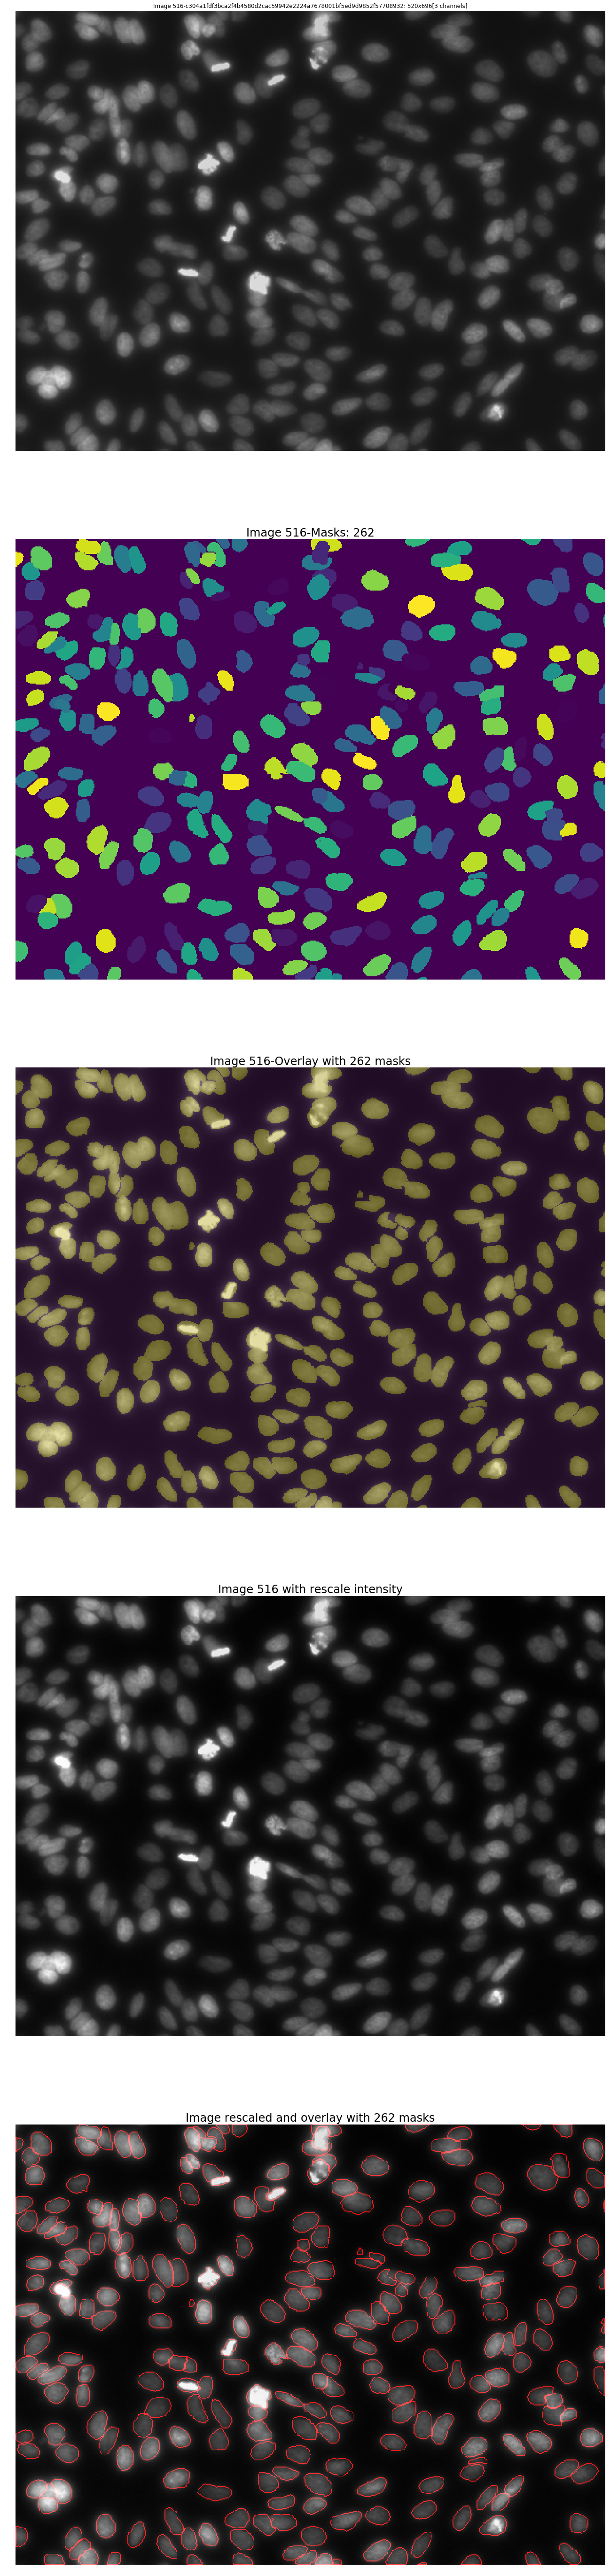

In [27]:
i=516
display_image_masks(i, gnfPD.image_id[i], 0)

In [ ]:
start=0; finish=16
for i in range(start,finish):
    display_image_masks(i, gnfPD.image_id[i], 0)


In [ ]:
gnfPD.image_id[0:50]